# Лабораторная работа № 4. Нейронные сети

Постройте нейросетевой классификатор для набора данных [MNIST](https://www.kaggle.com/c/digit-recognizer).

## Задание

1. Постройте двуслойную нейронную сеть.
2. Постройте отчет по классификации  [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) и матрицу ошибок [confusion_matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
3. Добавьте скрытые слои и оцените как изменится качество классификации.

In [33]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

import matplotlib.pyplot as plt

train, test = tf.keras.datasets.mnist.load_data()

X_train, y_train = train
X_test, y_test = test
n = X_train.shape[0]
nn = X_test.shape[0]
m = X_train.shape[1]*X_train.shape[2]

print("Кол-во примеров в обучающей выборке:",n)
print("Кол-во примеров в тестируемой выборке:",nn)
print("Размерность вектора признаков(размер изображения):",m,"px")


Кол-во примеров в обучающей выборке: 60000
Кол-во примеров в тестируемой выборке: 10000
Размерность вектора признаков(размер изображения): 784 px


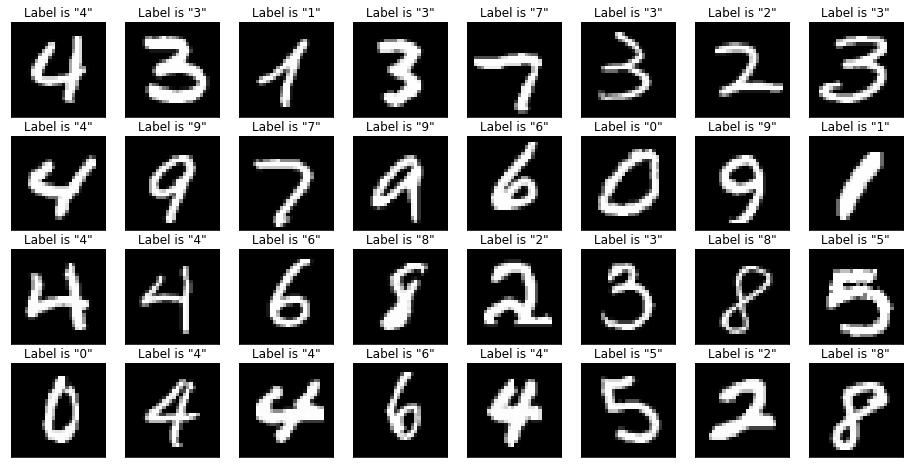

In [34]:
#Визуализация 
nrows = 4
ncols = 8
_, ax = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))
for k, nsample in enumerate(np.random.randint(low=0, high=n, size=nrows*ncols)):
    i = k // ncols
    j = k % ncols
    ax[i, j].imshow(X_train[nsample], cmap='gray')
    ax[i, j].set_title('Label is "{}"'.format(y_train[nsample]))
    ax[i, j].xaxis.set_visible(False)
    ax[i, j].yaxis.set_visible(False)

In [35]:
# Без скрытых слоев
model = Sequential()
model.add(InputLayer(input_shape=(m, ), name="Input"))
model.add(Dense(units=10,activation='softmax',name="Output"))

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
 X_train_n.reshape(-1, m),
 y_train_c,
 batch_size=32, # 32 объекта для подсчета градиента на каждом шаге
 epochs=10,     # 10 проходов по датасету
 validation_data=(X_test_n.reshape(-1, m), y_test_c)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.8822 - val_loss: 0.0503 - val_accuracy: 0.9183
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9162 - val_loss: 0.0480 - val_accuracy: 0.9209
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0482 - accuracy: 0.9210 - val_loss: 0.0469 - val_accuracy: 0.9250
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0470 - accuracy: 0.9234 - val_loss: 0.0461 - val_accuracy: 0.9272
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9258 - val_loss: 0.0467 - val_accuracy: 0.9262
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9269 - val_loss: 0.0467 - val_accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9281 - val_loss: 0.0471 - val_accuracy:

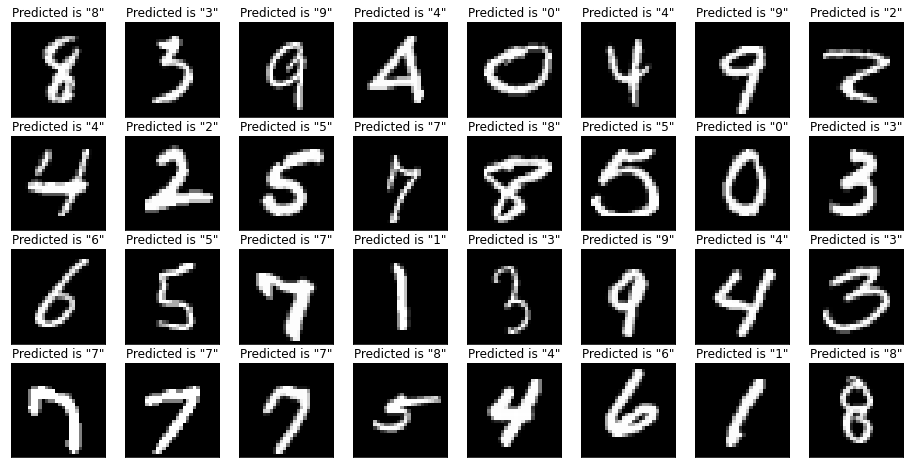

In [36]:
# Предсказание 
y_pred = model.predict_classes(X_test.reshape(-1, m))

#Визуализация 
nrows = 4
ncols = 8
_, ax = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))
for k, nsample in enumerate(np.random.randint(low=0, high=nn, size=nrows*ncols)):
    i = k // ncols
    j = k % ncols
    ax[i, j].imshow(X_test[nsample], cmap='gray')
    ax[i, j].set_title('Predicted is "{}"'.format(y_pred[nsample]))
    ax[i, j].xaxis.set_visible(False)
    ax[i, j].yaxis.set_visible(False)

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Classification report")
print(classification_report(y_test, y_pred))

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.98      0.96      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.89      0.92      0.91      1010
           4       0.94      0.91      0.93       982
           5       0.98      0.73      0.83       892
           6       0.94      0.96      0.95       958
           7       0.96      0.89      0.92      1028
           8       0.74      0.94      0.83       974
           9       0.88      0.93      0.90      1009

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

Confusion matrix
[[ 963    0    0    2    0    1    5    2    7    0]
 [   0 1090    4    1    0    1    4    2   33    0]
 [  10    4  907   18    6    1   14    7   61    4]
 [   3    0   16  930    1    4    2    8  

In [38]:
# С скрытыми слоями
model_s = Sequential()
model_s.add(InputLayer(input_shape=(m, ), name="Input"))
model_s.add(Dense(units=90))
model_s.add(Dense(units=36))
model_s.add(Dense(units=10,activation='softmax',name="Output"))

model_s.compile(loss='binary_crossentropy', metrics=['accuracy'])

model_s.fit(
 X_train_n.reshape(-1, m),
 y_train_c,
 batch_size=32,
 epochs=10, 
 validation_data=(X_test_n.reshape(-1, m), y_test_c)
)

y_pred = model_s.predict_classes(X_test.reshape(-1, m))

print("Classification report")
print(classification_report(y_test, y_pred))

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0613 - accuracy: 0.8963 - val_loss: 0.0539 - val_accuracy: 0.9089
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9147 - val_loss: 0.0527 - val_accuracy: 0.9138
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9177 - val_loss: 0.0493 - val_accuracy: 0.9194
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0491 - accuracy: 0.9200 - val_loss: 0.0503 - val_accuracy: 0.9190
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0485 - accuracy: 0.9214 - val_loss: 0.0467 - val_accuracy: 0.9249
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0480 - accuracy: 0.9232 - val_loss: 0.0503 - val_accuracy: 0.9211
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9235 - val_loss: 0.0490 - val_accuracy: